In [2]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prajuktadey
Your Kaggle Key: ··········


100%|██████████| 15.1M/15.1M [00:00<00:00, 103MB/s] 

In [5]:
pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=70456175754943727a8a9185b882fa8d3bb4472497ad19e38ef0ee3817812a44
  Stored in directory: /root/.cache/pip/wheels/72/1e/42/a9322736ec046a637487005e6b84c94617d9ac0bdb5159eeb7
Successfully built umap


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [7]:
os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset')

['yes', 'no']

In [8]:
yes=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
no=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')

In [9]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [10]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [11]:
len(data_target)==len(data)

True

In [12]:
yes_values=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes')
no_values=os.listdir('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no')

In [13]:
X_data =[]
for file in yes_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [14]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)
len(X_data)==len(data)==len(data_target)

True

In [15]:
X = np.squeeze(X_data)

In [16]:
X.shape

(253, 32, 32, 3)

#Normalization of Data

In [17]:
X = X.astype('float32')
X /= 255

In [18]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

#Model Building

In [19]:
model = tf.keras.Sequential()

# defining the input shape in the first layer
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 16)          0

In [20]:
# binary cross-entropy

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [21]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 4s 964ms/step - loss: 0.6647 - acc: 0.4368 - val_loss: 1.5962 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 2s 762ms/step - loss: 0.5710 - acc: 0.8158 - val_loss: 0.9157 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 1s 408ms/step - loss: 0.4906 - acc: 0.8158 - val_loss: 0.8672 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 1s 401ms/step - loss: 0.5016 - acc: 0.8158 - val_loss: 1.0468 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 1s 407ms/step - loss: 0.4556 - acc: 0.8158 - val_loss: 1.3990 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 1s 404ms/step - loss: 0.4865 - acc: 0.8158 - val_loss: 1.3210 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 1s 409ms/step - loss: 0.4575 - acc: 0.8158 - val_loss: 1.0271 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 1s 4

In [25]:
# evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7142857313156128


2/2 [==============================] - 0s 39ms/step


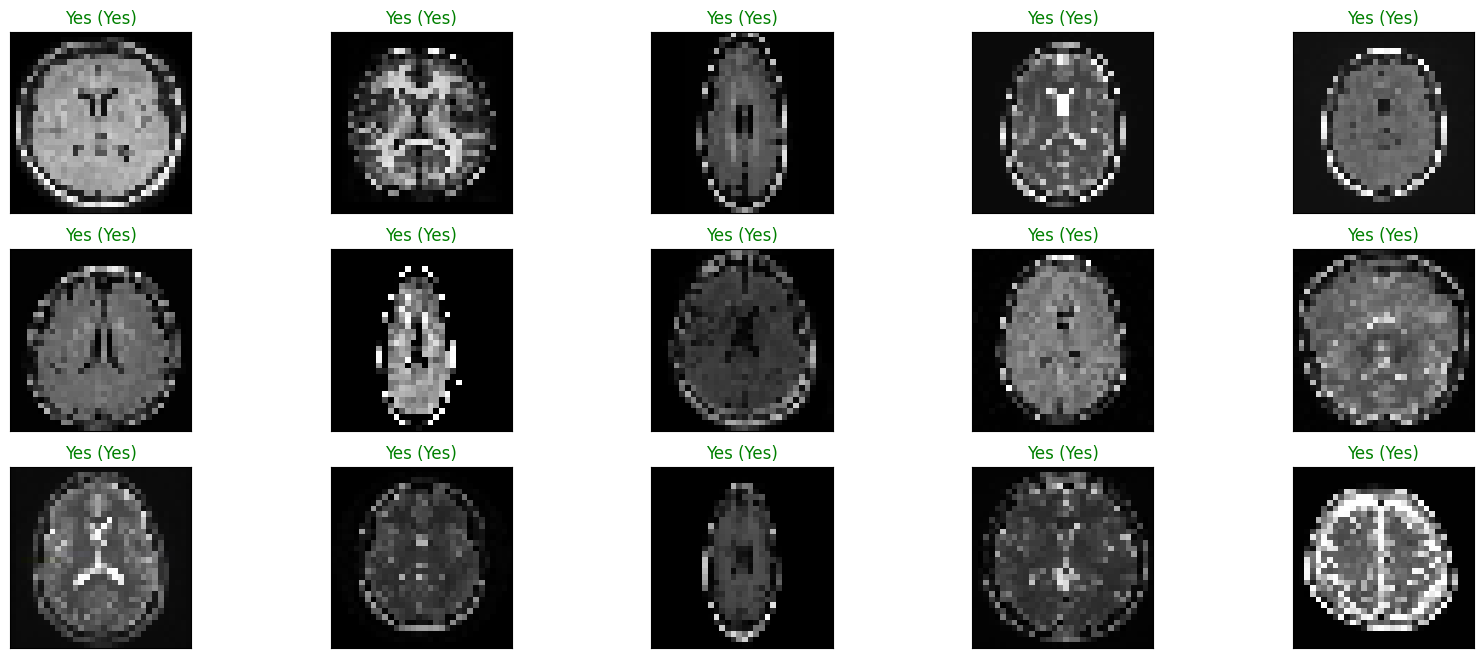

In [23]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]
y_hat = model.predict(x_test)

# plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()